In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedakram1","key":"66701960f6726013c71587d887b8253a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 99% 531M/534M [00:03<00:00, 59.7MB/s]
100% 534M/534M [00:03<00:00, 168MB/s] 


In [4]:
!unzip /content/vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms,models
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm_notebook, tqdm
from PIL import Image

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using GPU


In [7]:
train_dir = '/content/Vegetable Images/train'
val_dir = '/content/Vegetable Images/validation'
test_dir = '/content/Vegetable Images/test'

In [8]:
def plot_random_image (target_dir):
  """
  Takes the directory and prints 5 random images form the same class
  """
  target_class=random.choice(os.listdir(target_dir))
  target_folder=os.path.join(target_dir,target_class)
  random_image=random.sample(os.listdir(target_folder),6)
  plt.figure(figsize=(16,4))
  for i in range(6):

      plt.subplot(1,6,i+1)
#         img=Image.open(os.path.join(target_folder,random_image[i]))
      img=torchvision.io.read_image(os.path.join(target_folder,random_image[i]))
#         plt.imshow(img)
      plt.imshow(np.array(img).transpose(1,2,0))
      plt.title(f'{target_class}\n{np.array(img).shape}')
#         plt.axis(False)
      plt.xticks([]);
      plt.yticks([])
      plt.tight_layout()
  plt.show()

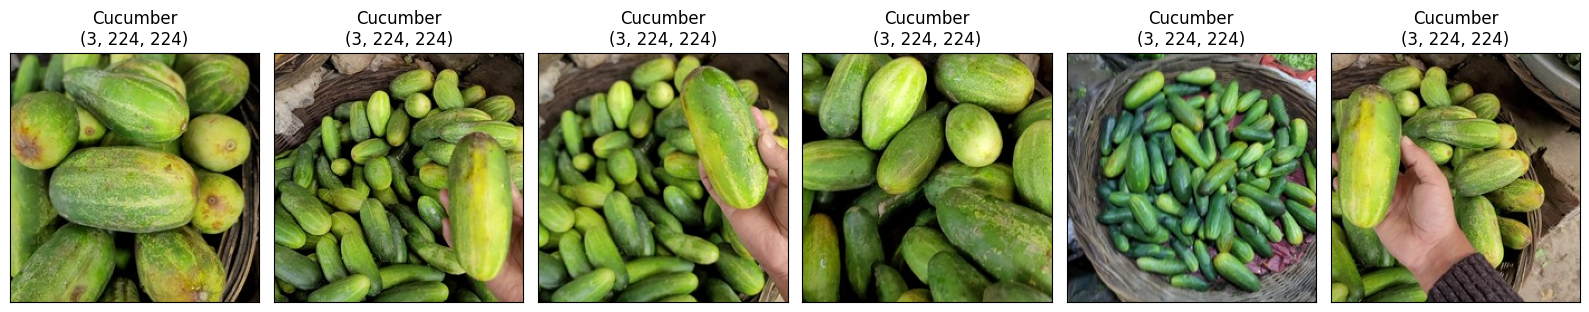

In [9]:
plot_random_image(train_dir)

In [11]:
mean=[0.485,0.456,0.406]
std=[0.229,0.224,0.225]
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.1, hue = 0.1, saturation = 0.1),
    transforms.RandomAffine(degrees = 15, translate = (0.1,0.1), scale=(1, 2), shear=15),
    transforms.GaussianBlur(kernel_size=(5,9)),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([


                                     transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     ])

In [12]:
train_dataset = torchvision.datasets.ImageFolder(root = train_dir, transform = train_transform)
val_dataset = torchvision.datasets.ImageFolder(root = val_dir, transform = test_transform)
test_dataset = torchvision.datasets.ImageFolder(root = test_dir, transform = test_transform)

In [13]:
augmentation_list=[transforms.RandomHorizontalFlip(p=1.0),
                   transforms.RandomRotation(15),
                   transforms.ColorJitter(brightness=0.2,contrast=0.1,hue=0.1,saturation=0.1),
                   transforms.RandomAffine(degrees=15, translate=(0.1,0.1), scale=(0.5, 1.5), shear=15),
                   transforms.GaussianBlur(kernel_size=(5,9)),
                   transforms.Normalize(mean,std)
                  ]

In [14]:
def plot_original_and_aug_image(target_dir,aug_list):
    """
    takes the directory as input and prints 1 random images from the randomly choosen class with without augmentation for each augmentation passed.
    """
    n=len(aug_list)
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),n)


    for i in range(n):
        plt.figure(figsize=(16,6))
        augmentation=aug_list[i]
        plt.subplot(1,2,1)
        img=torchvision.io.read_image(os.path.join(target_folder,random_image[i]))
        img=img/255.0
        plt.imshow(np.array(img).transpose(1,2,0))
        plt.title(f'Original Image\n{target_class}\n{np.array(img).shape}')
        plt.xticks([]);
        plt.yticks([])

        plt.subplot(1,2,2)

        img=augmentation(img)


        plt.imshow(np.array(img).transpose(1,2,0))
        plt.title(f'Augmented Image:{augmentation}\n{target_class}\n{np.array(img).shape}')
        plt.xticks([]);
        plt.yticks([])
        plt.show()

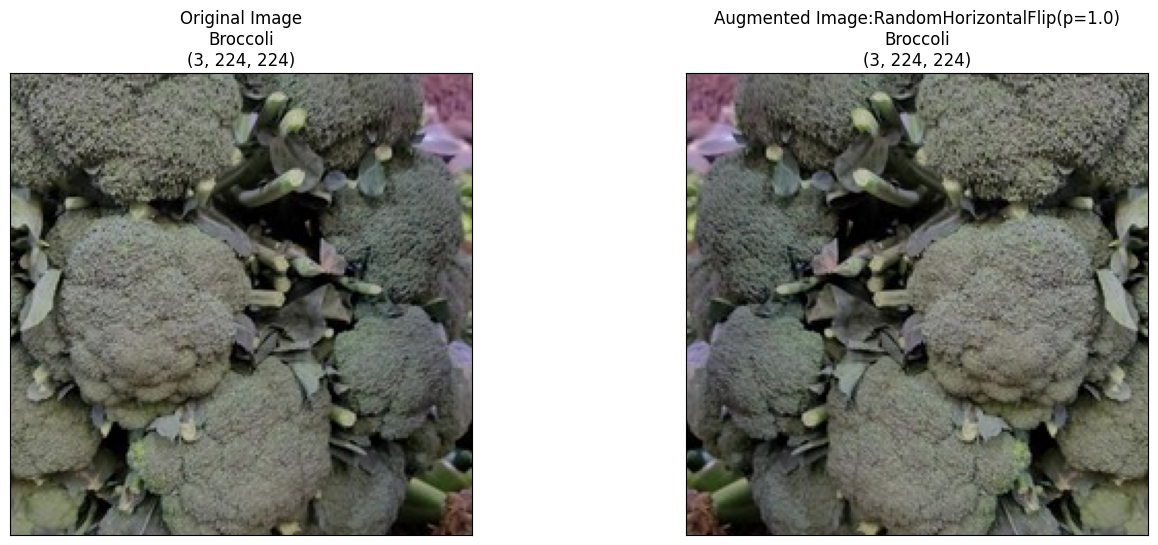

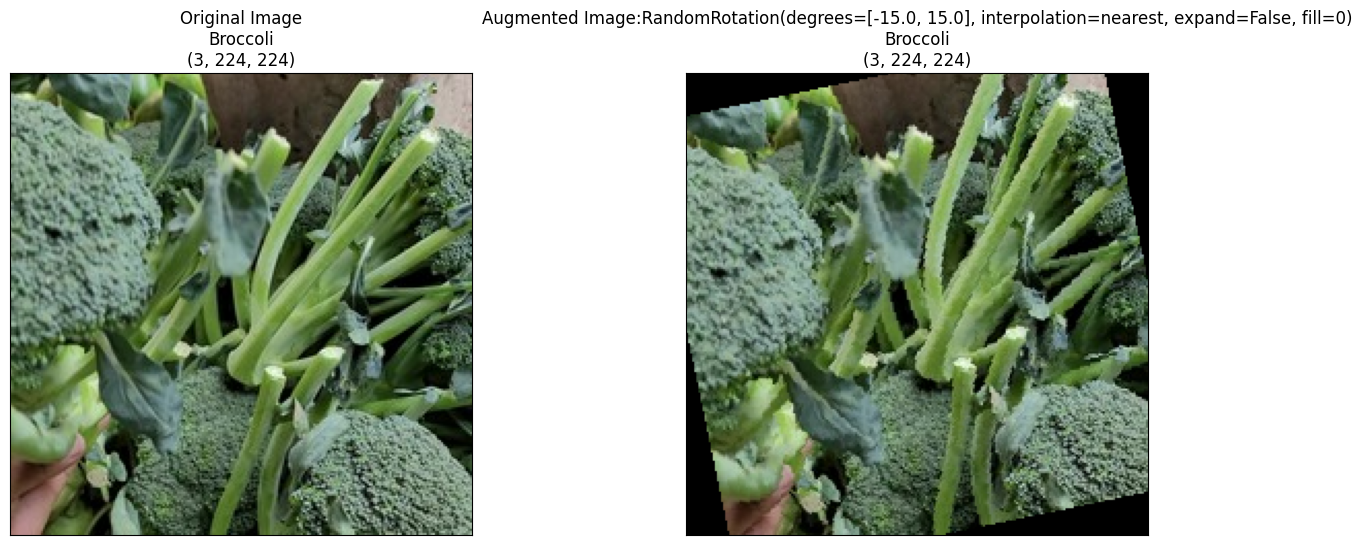

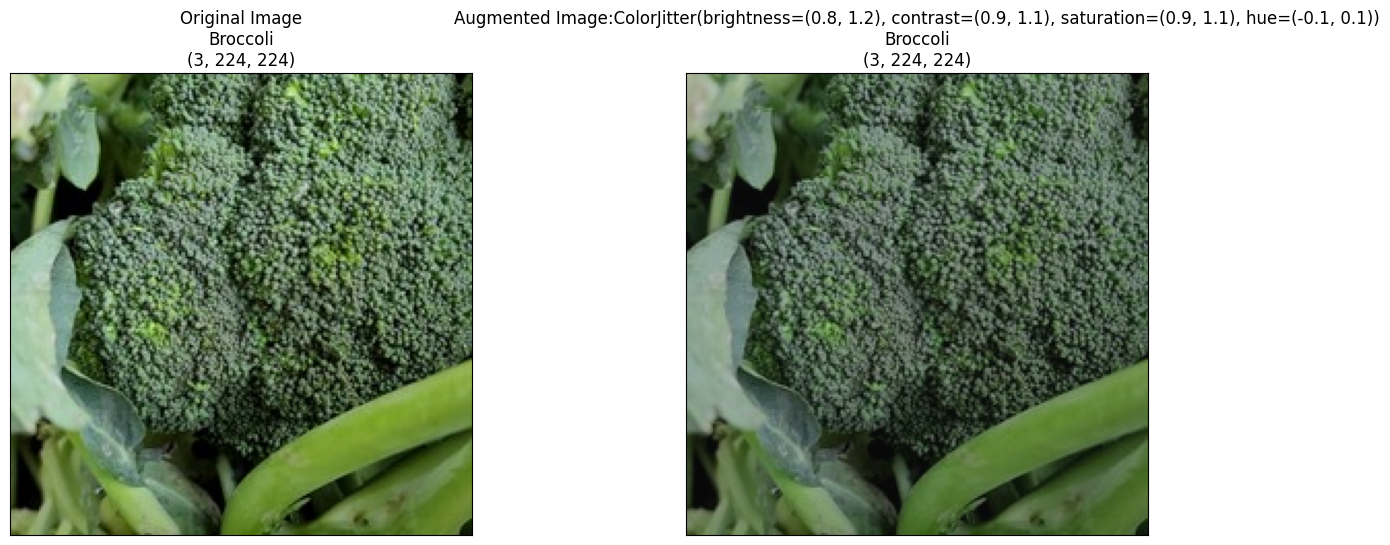

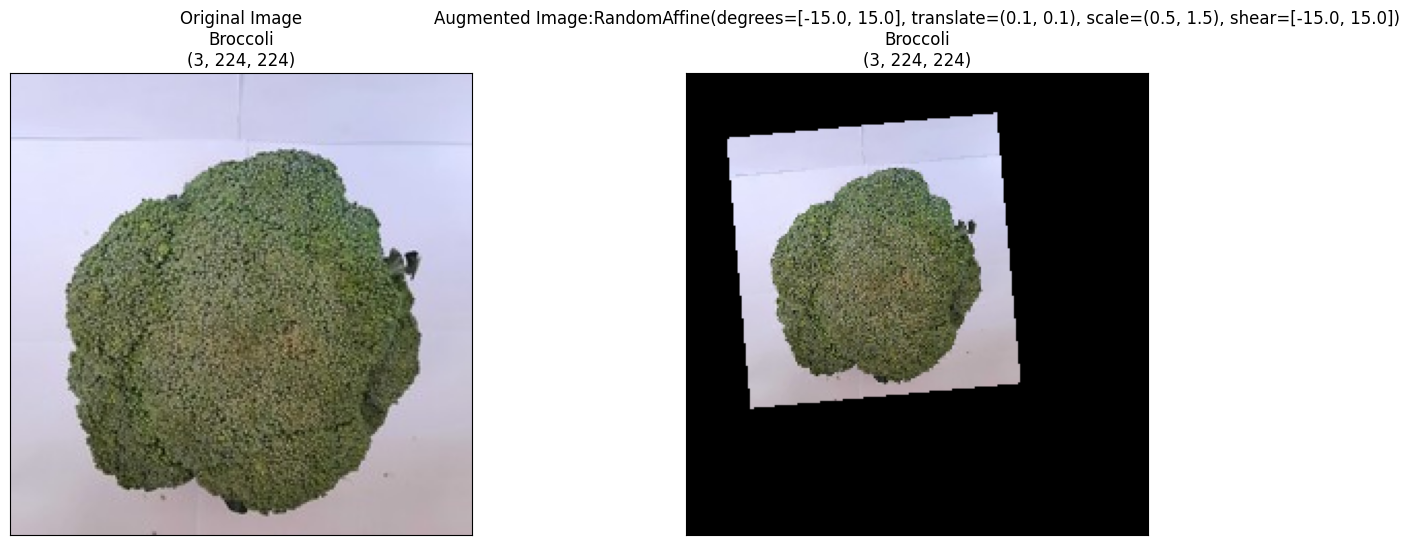

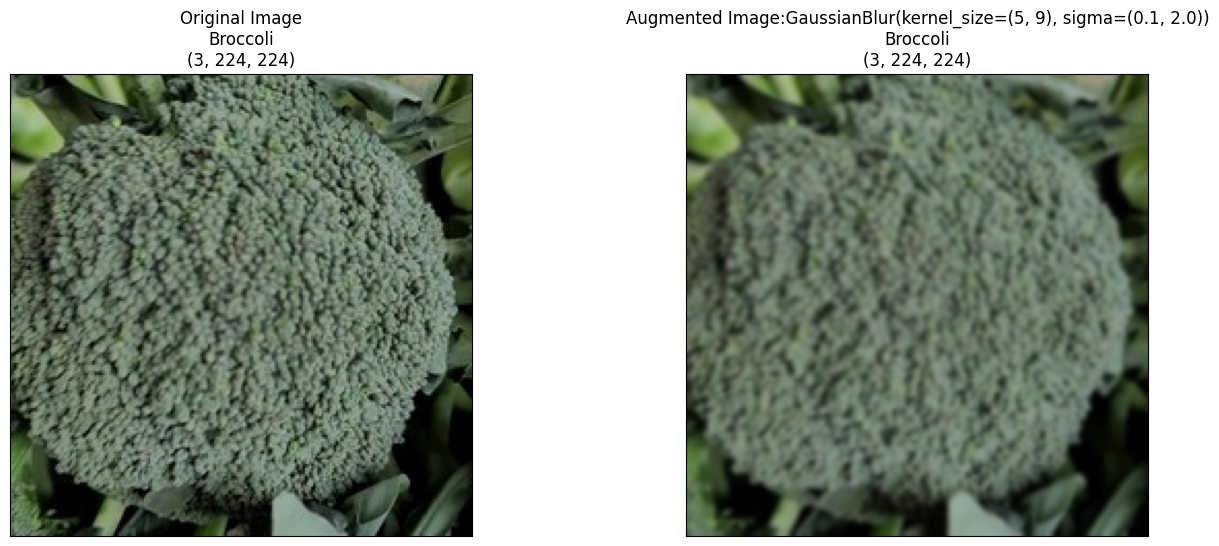

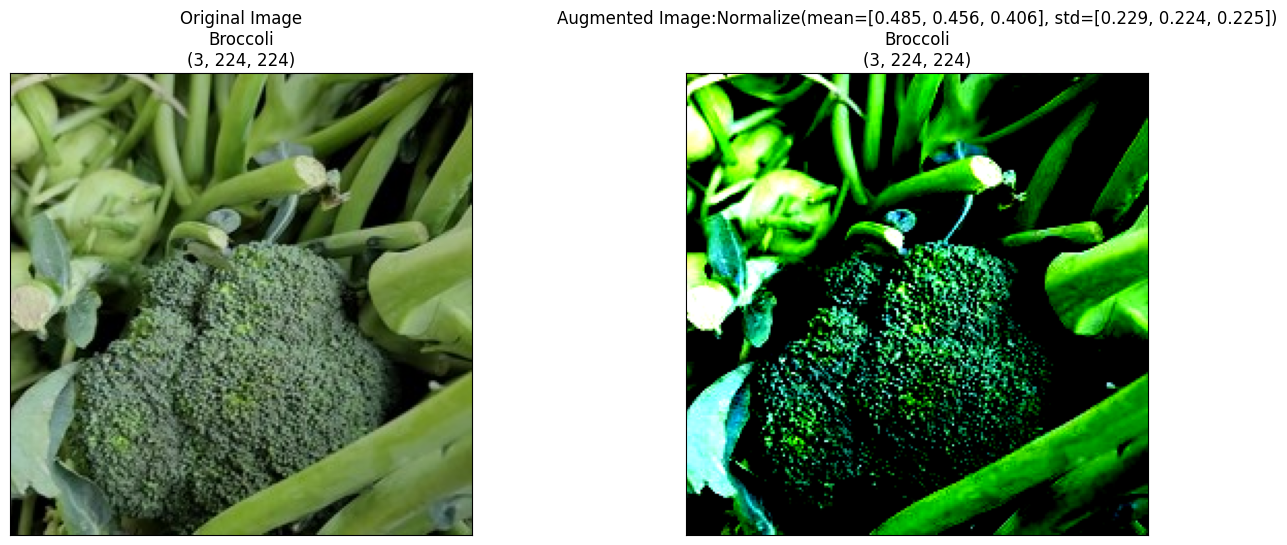

In [15]:
plot_original_and_aug_image(train_dir,augmentation_list)

In [16]:
class_names=train_dataset.classes
len(class_names),class_names[:5]

(15, ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli'])

In [17]:
BATCH_SIZE = 32
train_dl = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)
val_dl = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 2)
test_dl = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 2)

In [18]:
model = models.vgg16(pretrained = True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:06<00:00, 84.6MB/s]


In [19]:
print(f"VGG16 model simmary : \n {model.named_parameters}")

VGG16 model simmary : 
 <bound method Module.named_parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
 

In [20]:
for param in model.parameters():
  param.requires_grad = False

In [21]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [22]:
model.classifier[-1] = nn.Linear(4096, len(class_names))

In [23]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [24]:
torch.save(model.state_dict(), 'initial_weights.pt')

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.1)

In [26]:
def train_model(model ,num_epochs, train_dl, valid_dl, lr_scheduler = None, model_name = "model"):
  model.to(device)
  max_acc = 0.0
  torch.save(model.state_dict(), f"best_weights_of{model_name}.pt")
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train=[0]*num_epochs
  loss_hist_valid=[0]*num_epochs
  accuracy_hist_valid=[0]*num_epochs
  for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct = 0, 0
    for x_batch, y_batch in train_dl:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item() * y_batch.size(0)
      train_correct += (torch.argmax(pred, dim = 1) == y_batch).sum().item()

    train_loss /= len(train_dl.dataset)
    train_acc = train_correct / len(train_dl.dataset)
    loss_hist_train[epoch] = train_loss
    accuracy_hist_train[epoch] = train_acc

    model.eval()
    val_loss, val_correct = 0, 0
    with torch.no_grad():
      for x_batch, y_batch in valid_dl:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)

        val_loss += loss.item() * y_batch.size(0)
        val_correct += (torch.argmax(pred, dim = 1) == y_batch).sum().item()

    val_loss /= len(valid_dl.dataset)
    val_acc = val_correct / len(valid_dl.dataset)
    loss_hist_valid[epoch] = val_loss
    accuracy_hist_valid[epoch] = val_acc
    print(f"Epoch {epoch+1}/{num_epochs} - "
        f"loss: {train_loss:.4f} - acc: {train_acc:.4f} - "
        f"val_loss: {val_loss:.4f} - val_acc: {val_acc:.4f}")
  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [27]:
num_epochs = 6
loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid = train_model(model, num_epochs, train_dl, val_dl)

Epoch 1/6 - loss: 0.6701 - acc: 0.7891 - val_loss: 0.1473 - val_acc: 0.9487
Epoch 2/6 - loss: 0.4472 - acc: 0.8540 - val_loss: 0.1214 - val_acc: 0.9560
Epoch 3/6 - loss: 0.4040 - acc: 0.8633 - val_loss: 0.1405 - val_acc: 0.9503
Epoch 4/6 - loss: 0.3965 - acc: 0.8689 - val_loss: 0.1097 - val_acc: 0.9627
Epoch 5/6 - loss: 0.3838 - acc: 0.8736 - val_loss: 0.1182 - val_acc: 0.9597
Epoch 6/6 - loss: 0.3821 - acc: 0.8761 - val_loss: 0.0932 - val_acc: 0.9680


In [28]:
def plot_learning_curves(loss_train, loss_val, acc_train, acc_val):
    """
    Plots training & validation loss and accuracy.

    Args:
        loss_train: list of training losses
        loss_val: list of validation losses
        acc_train: list of training accuracies
        acc_val: list of validation accuracies
    """
    # Convert tensors to floats if needed
    acc_train = [x.item() if hasattr(x, 'item') else x for x in acc_train]
    acc_val   = [x.item() if hasattr(x, 'item') else x for x in acc_val]

    epochs = range(1, len(loss_train)+1)

    fig, axs = plt.subplots(1, 2, figsize=(16,5))

    # --- Loss subplot ---
    axs[0].plot(epochs, loss_train, marker='o', linestyle='-', color='blue', label='Train Loss')
    axs[0].plot(epochs, loss_val, marker='s', linestyle='--', color='orange', label='Validation Loss')
    axs[0].set_title('Loss per Epoch', fontsize=16)
    axs[0].set_xlabel('Epoch', fontsize=14)
    axs[0].set_ylabel('Loss', fontsize=14)
    axs[0].grid(True, linestyle='--', alpha=0.5)
    axs[0].legend(fontsize=12)

    # --- Accuracy subplot ---
    axs[1].plot(epochs, acc_train, marker='o', linestyle='-', color='blue', label='Train Accuracy')
    axs[1].plot(epochs, acc_val, marker='s', linestyle='--', color='orange', label='Validation Accuracy')
    axs[1].set_title('Accuracy per Epoch', fontsize=16)
    axs[1].set_xlabel('Epoch', fontsize=14)
    axs[1].set_ylabel('Accuracy', fontsize=14)
    axs[1].set_xticks(epochs)
    axs[1].set_ylim(0, 1)
    axs[1].grid(True, linestyle='--', alpha=0.5)
    axs[1].legend(fontsize=12)

    plt.tight_layout()
    plt.show()

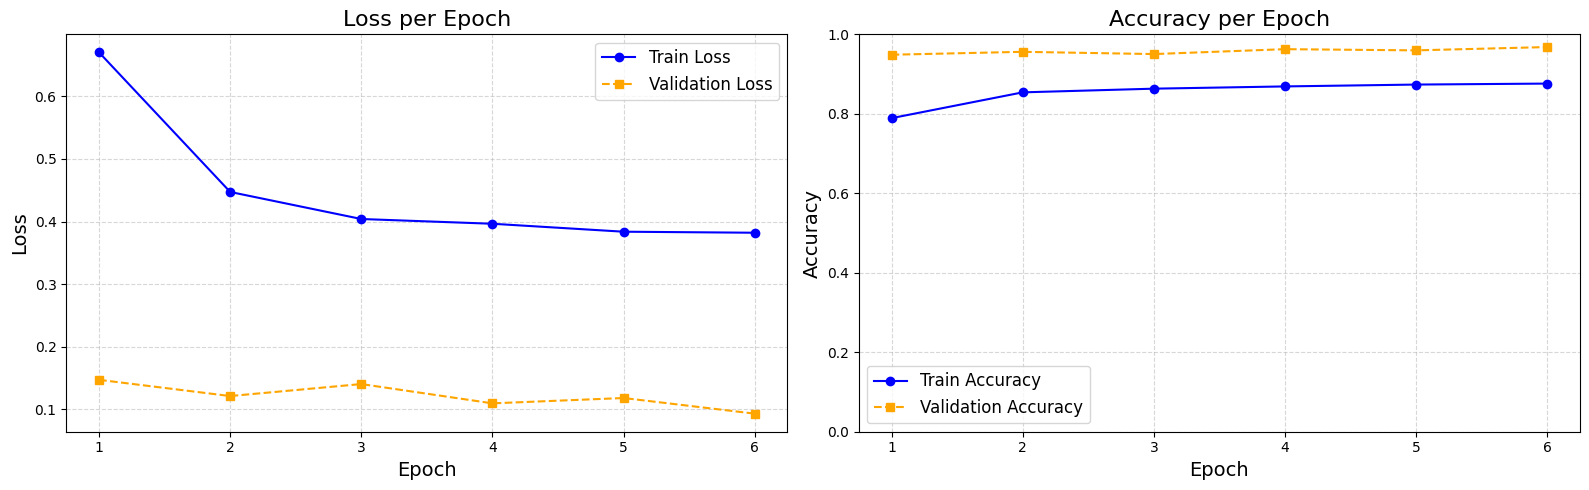

In [29]:
plot_learning_curves(loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid)

# Performance on test set

In [30]:
def evaluate(model, test_dl):
  model.eval()
  test_loss, test_correct = 0, 0
  with torch.no_grad():
    for x_batch, y_batch in test_dl:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)

      test_loss += loss.item() * y_batch.size(0)
      test_correct += (torch.argmax(pred, dim = 1) == y_batch).sum().item()
  test_loss /= len(test_dl.dataset)
  test_acc = test_correct / len(test_dl.dataset)
  print(f"Test loss: {test_loss:.4f} - Test acc: {test_acc:.4f}")

In [31]:
evaluate(model, test_dl)

Test loss: 0.1034 - Test acc: 0.9663


In [33]:
layers=[]
for param in model.parameters():
    layers.append(param)

In [34]:
for layer in layers[-10:]:
    layer.requires_grad=True

In [35]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True


In [36]:
# adding loss_fn and optimizer to the model
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [37]:
def train_lr_scheduler(model ,num_epochs, train_dl, valid_dl, lr_scheduler = None, model_name = "model"):
  model.to(device)
  max_acc = 0.0
  torch.save(model.state_dict(), f"best_weights_of{model_name}.pt")
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train=[0]*num_epochs
  loss_hist_valid=[0]*num_epochs
  accuracy_hist_valid=[0]*num_epochs
  for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct = 0, 0
    for x_batch, y_batch in train_dl:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item() * y_batch.size(0)
      train_correct += (torch.argmax(pred, dim = 1) == y_batch).sum().item()

    train_loss /= len(train_dl.dataset)
    train_acc = train_correct / len(train_dl.dataset)
    loss_hist_train[epoch] = train_loss
    accuracy_hist_train[epoch] = train_acc

    model.eval()
    val_loss, val_correct = 0, 0
    with torch.no_grad():
      for x_batch, y_batch in valid_dl:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)

        val_loss += loss.item() * y_batch.size(0)
        val_correct += (torch.argmax(pred, dim = 1) == y_batch).sum().item()

    val_loss /= len(valid_dl.dataset)
    val_acc = val_correct / len(valid_dl.dataset)
    loss_hist_valid[epoch] = val_loss
    accuracy_hist_valid[epoch] = val_acc
    print(f"Epoch {epoch+1}/{num_epochs} - "
        f"loss: {train_loss:.4f} - acc: {train_acc:.4f} - "
        f"val_loss: {val_loss:.4f} - val_acc: {val_acc:.4f}")

    if lr_scheduler is not None:
      lr_scheduler.step()
    if val_acc > max_acc:
      max_acc = val_acc
      torch.save(model.state_dict(), f"best_weights_of{model_name}.pt")
  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [40]:
num_epochs=12
loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid = train_lr_scheduler(model,num_epochs,train_dl,val_dl,exp_lr_scheduler)

Epoch 1/12 - loss: 0.1662 - acc: 0.9486 - val_loss: 0.0399 - val_acc: 0.9897
Epoch 2/12 - loss: 0.1165 - acc: 0.9628 - val_loss: 0.0464 - val_acc: 0.9910
Epoch 3/12 - loss: 0.1108 - acc: 0.9674 - val_loss: 0.0938 - val_acc: 0.9763
Epoch 4/12 - loss: 0.0889 - acc: 0.9741 - val_loss: 0.0866 - val_acc: 0.9820
Epoch 5/12 - loss: 0.0742 - acc: 0.9778 - val_loss: 0.0534 - val_acc: 0.9897
Epoch 6/12 - loss: 0.0396 - acc: 0.9877 - val_loss: 0.0402 - val_acc: 0.9937
Epoch 7/12 - loss: 0.0284 - acc: 0.9907 - val_loss: 0.0275 - val_acc: 0.9947
Epoch 8/12 - loss: 0.0240 - acc: 0.9921 - val_loss: 0.0286 - val_acc: 0.9950
Epoch 9/12 - loss: 0.0254 - acc: 0.9933 - val_loss: 0.0303 - val_acc: 0.9950
Epoch 10/12 - loss: 0.0222 - acc: 0.9921 - val_loss: 0.0229 - val_acc: 0.9960
Epoch 11/12 - loss: 0.0171 - acc: 0.9944 - val_loss: 0.0221 - val_acc: 0.9960
Epoch 12/12 - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0242 - val_acc: 0.9953


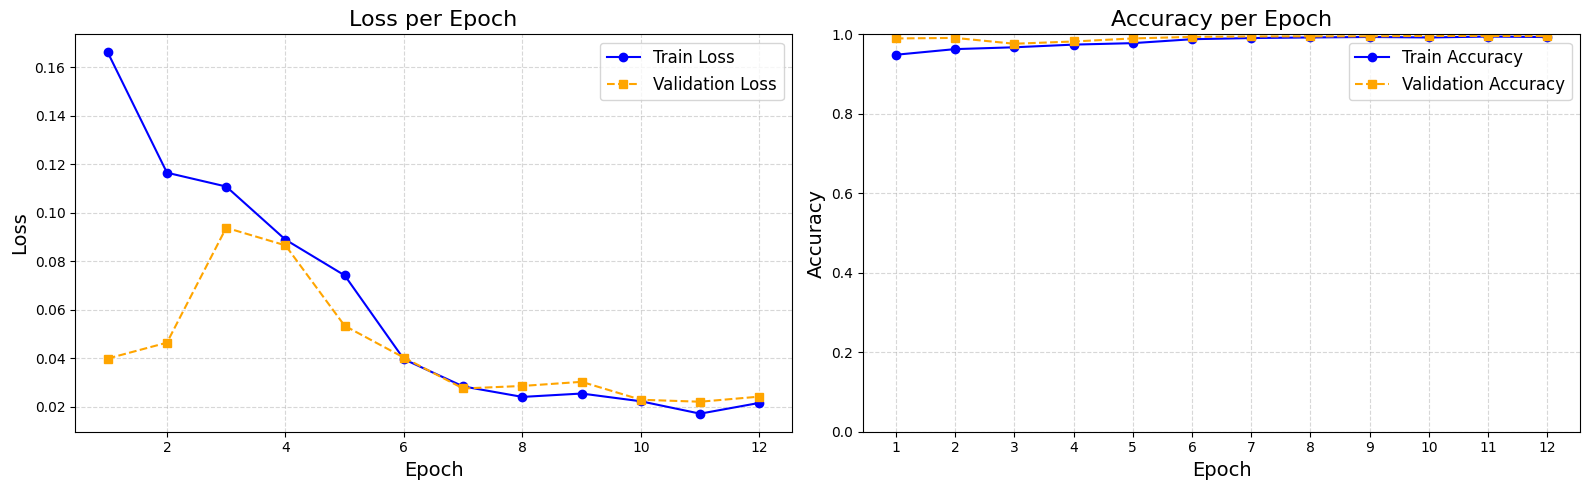

In [41]:
plot_learning_curves(loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid)

In [42]:
evaluate(model, test_dl)

Test loss: 0.0059 - Test acc: 0.9983


# Thank you!